In [1]:
import pathlib

from google.colab import drive
drive.mount('/content/drive')

data_dir = "/content/drive/MyDrive/"
data_dir = pathlib.Path(data_dir)


Mounted at /content/drive


In [2]:
%cd ./gdrive/My Drive/datasetnthn
!ls

[Errno 2] No such file or directory: './gdrive/My Drive/datasetnthn'
/content
drive  sample_data


In [4]:
import os

file_path ="/content/drive/MyDrive/datasetnthn/"
class_names = sorted(os.listdir(file_path+'train'))

for class_name in class_names:
    class_path = os.path.join(file_path+'train', class_name)
    class_files = os.listdir(class_path)
    print(f'total training {class_name}', len(class_files))
    print(class_files[:5])
    print('\n=========================================================\n')

total training ikan-bawal 250
['ikan_bawal (75).jpg', 'ikan_bawal (81).jpg', 'ikan_bawal (85).jpg', 'ikan_bawal (66).jpg', 'ikan_bawal (72).jpg']


total training ikan-belut 250
['ikan_belut (14).jpg', 'ikan_belut (34).jpg', 'ikan_belut (33).jpg', 'ikan_belut (83).jpg', 'ikan_belut (98).jpg']


total training ikan-gurame 250
['gurame_98.jpg', 'ikan_gurame (78).jpg', 'ikan_gurame (44).jpg', 'ikan_gurame (25).jpg', 'ikan_gurame (24).jpg']


total training ikan-kembung 253
['ikan_kembung (36).jpg', 'ikan_kembung (37).jpg', 'ikan_kembung (41).jpg', 'ikan_kembung (40).jpg', 'ikan_kembung (47).jpg']


total training ikan-lele 247
['lele_14.jpg', 'lele_17.jpg', 'lele_13.jpg', 'lele_8.jpg', 'lele_15.jpg']


total training ikan-mas 250
['ikan_mas (1).jpg', 'ikan_mas (14).jpg', 'ikan_mas (3).jpg', 'ikan_mas (7).jpg', 'ikan_mas (4).jpg']


total training ikan-nila 250
['Mujair (61).jpg', 'Mujair (78).jpg', 'Mujair (65).jpg', 'Mujair (71).jpg', 'Mujair (70).jpg']


total training ikan-patin 250
['

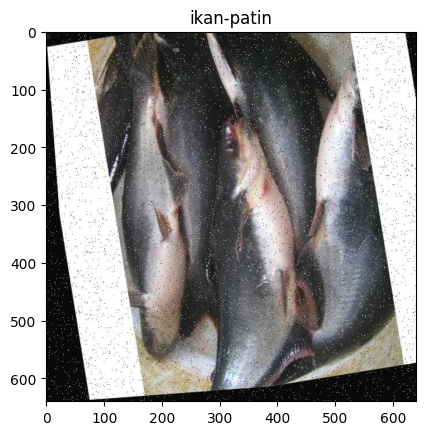

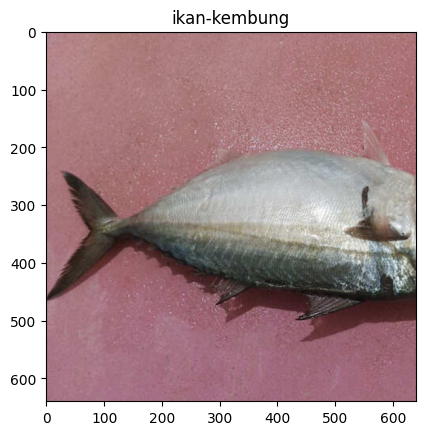

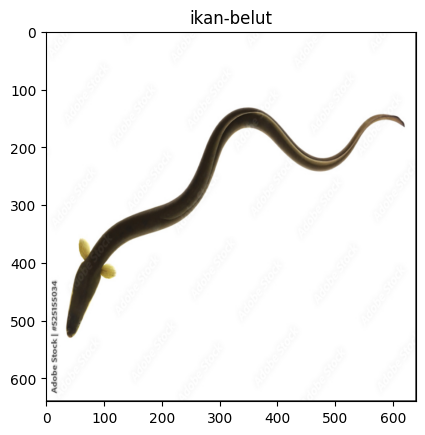

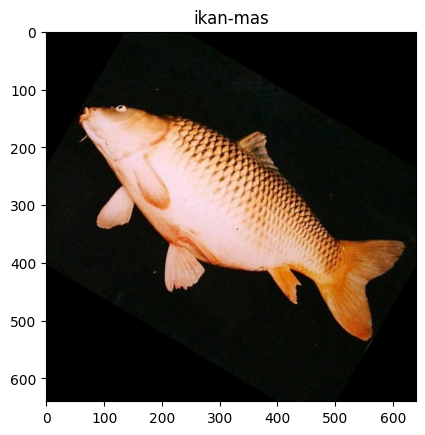

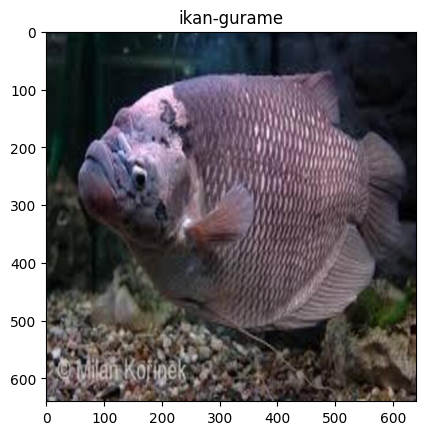

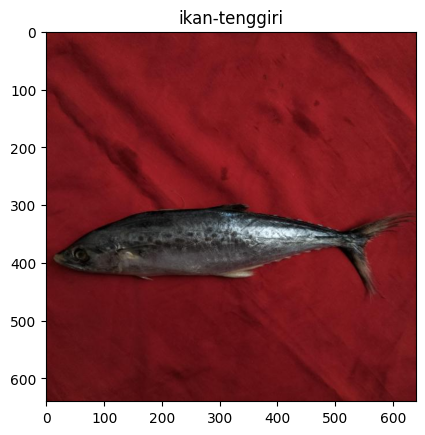

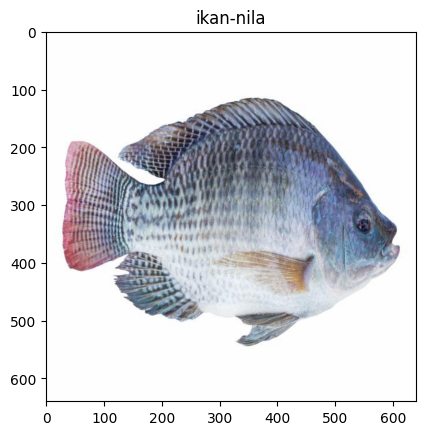

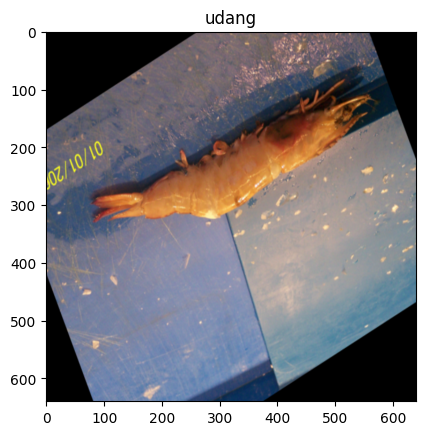

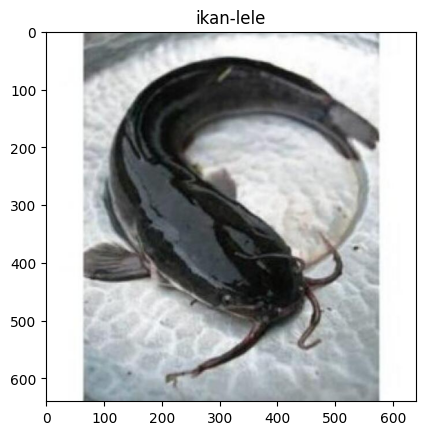

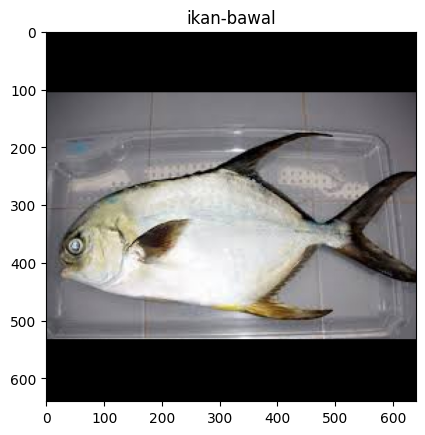

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class_dirs = [d for d in os.listdir(file_path+'train') if os.path.isdir(os.path.join(file_path+'train', d))]

for class_dir in class_dirs:
    class_dir_path = os.path.join(file_path+'train', class_dir)
    image_file = os.listdir(class_dir_path)[0]
    image_path = os.path.join(class_dir_path, image_file)

    # Muat dan tampilkan gambar
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(class_dir)
    plt.show()

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = file_path+"train/"
training_datagen = ImageDataGenerator(
      rescale = 1.0/255.)

VALIDATION_DIR = file_path+"valid/"
validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(300,300),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(300,300),
    class_mode='categorical'
)

Found 2500 images belonging to 10 classes.
Found 400 images belonging to 10 classes.


In [11]:


img_width, img_height = 300,300
batch_size = 52

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


for layer in base_model.layers[:100]:
    layer.trainable = False
for layer in base_model.layers[100:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)

Epoch 1/10
48/48 [==============================] - 604s 12s/step - loss: 1.9609 - accuracy: 0.3329 - val_loss: 1.4670 - val_accuracy: 0.6875
Epoch 2/10
48/48 [==============================] - 212s 4s/step - loss: 1.1873 - accuracy: 0.6615 - val_loss: 1.0777 - val_accuracy: 0.7455
Epoch 3/10
48/48 [==============================] - 91s 2s/step - loss: 0.8651 - accuracy: 0.7656 - val_loss: 0.8023 - val_accuracy: 0.8214
Epoch 4/10
48/48 [==============================] - 44s 931ms/step - loss: 0.6797 - accuracy: 0.8099 - val_loss: 0.6658 - val_accuracy: 0.8438
Epoch 5/10
48/48 [==============================] - 26s 550ms/step - loss: 0.5632 - accuracy: 0.8477 - val_loss: 0.5967 - val_accuracy: 0.8616
Epoch 6/10
48/48 [==============================] - 18s 373ms/step - loss: 0.4981 - accuracy: 0.8600 - val_loss: 0.5579 - val_accuracy: 0.8527
Epoch 7/10
48/48 [==============================] - 19s 386ms/step - loss: 0.4212 - accuracy: 0.8887 - val_loss: 0.4805 - val_accuracy: 0.8527
Epoch

In [12]:
scores = model.evaluate(validation_generator)
scores = model.evaluate(train_generator)

79/79 [==============================] - 21s 263ms/step - loss: 0.0626 - accuracy: 0.9808


In [17]:
model.save('FishiFyModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


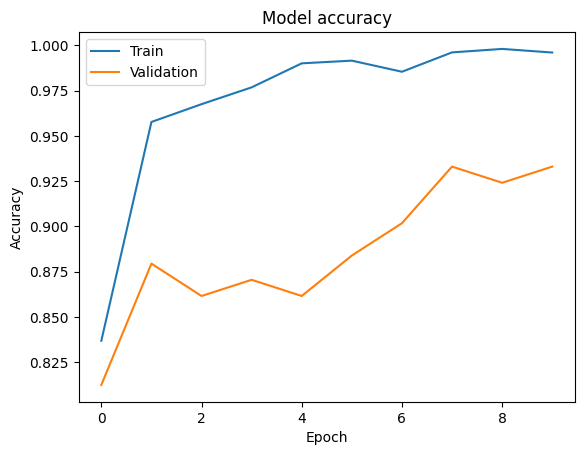

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

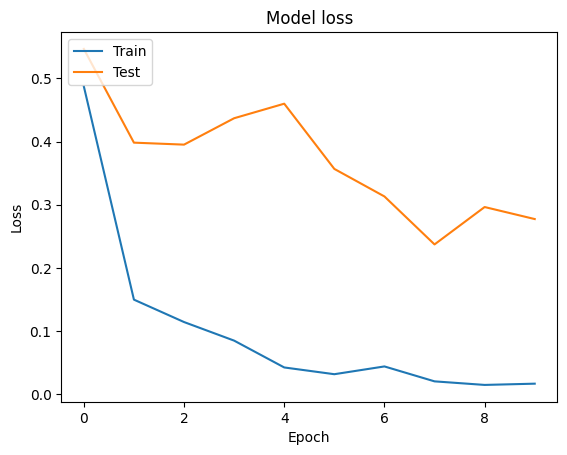

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Saving Ikan_Lele_12_jpg.rf.1cb81ccefa7dc33620c4d15f1dc9d157.jpg to Ikan_Lele_12_jpg.rf.1cb81ccefa7dc33620c4d15f1dc9d157.jpg
1/1 [==============================] - 0s 21ms/step


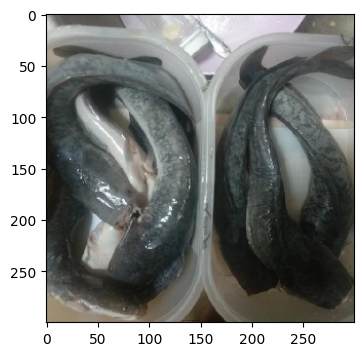

ikan-bawal: 0.01%
ikan-belut: 0.09%
ikan-gurame: 0.00%
ikan-kembung: 0.01%
ikan-lele: 99.82%
ikan-mas: 0.01%
ikan-nila: 0.05%
ikan-patin: 0.00%
ikan-tenggiri: 0.01%
udang: 0.00%


In [33]:
import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Mendapatkan label kelas
class_labels = list(train_generator.class_indices.keys())

# Mengunggah file
uploaded_files = files.upload()

# Melakukan prediksi untuk setiap file yang diunggah
for filename in uploaded_files.keys():
    # Membuka dan memproses gambar
    img_path = filename
    img = image.load_img(img_path, target_size=(300,300))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(img_array_expanded_dims)

    # Menumpuk gambar dan melakukan prediksi
    stacked_images = np.vstack([preprocessed_img])
    probabilities = model.predict(stacked_images)[0]

    # Menampilkan gambar dan probabilitas prediksi
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.show()
    for (class_label, probability) in zip(class_labels, probabilities):
        print(f"{class_label}: {probability * 100:.2f}%")


In [18]:
model = tf.keras.models.load_model('FishiFyModel.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open('FishiFyModel2.tflite', 'wb') as f:
    f.write(tflite_model)